
## **Explorando Dados de Depressão**  
#### **Análise de Fatores e Predição de Diagnósticos**  

---

A depressão é uma condição complexa influenciada por diversos fatores psicológicos, sociais e biológicos. Este projeto busca compreender os principais indicadores associados ao diagnóstico da depressão, explorando dados, identificando padrões e aplicando modelos preditivos para extrair insights relevantes.  



**Tópicos abordados no projeto:**
- Tratamento e exploração dos dados  
- Análises estatísticas para identificar fatores de risco  
- Construção e avaliação de modelos de machine learning  



**Banco de Dados**  
Utilizamos o conjunto de dados público **"Depression Survey/Dataset for Analysis"**, originado de uma pesquisa que investiga os fatores de risco para depressão em adultos. Para mais detalhes, acesse a fonte original [aqui](https://www.kaggle.com/datasets/sumansharmadataworld/depression-surveydataset-for-analysis/data).  

---


##### **Dados e Bibliotecas**

Iniciamos a análise importando todas as bibliotecas necessárias, além de carregar os dados utilizados a partir de um arquivo .csv. Note que, inicialmente, definimos todas as variáveis como `str`, evitando possíveis transformações inadequadas.

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from graph_visualization import my_charts

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import category_encoders as ce
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

path = ""

In [367]:
df = pd.read_csv(path + "final_depression_dataset_1.csv", dtype='str')
df.head(4)

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Pooja,Female,37,Ghaziabad,Working Professional,Teacher,NaN,2,NaN,NaN,4,7-8 hours,Moderate,MA,No,6,2,No,No
1,Reyansh,Male,60,Kalyan,Working Professional,Financial Analyst,NaN,4,NaN,NaN,3,5-6 hours,Unhealthy,B.Com,Yes,0,4,Yes,No
2,Manvi,Female,42,Bhopal,Working Professional,Teacher,NaN,2,NaN,NaN,3,5-6 hours,Moderate,M.Com,No,0,2,No,No
3,Isha,Female,44,Thane,Working Professional,Teacher,NaN,3,NaN,NaN,5,7-8 hours,Healthy,MD,Yes,1,2,Yes,No


A seguir a definição de cada váriavel presente nos dados. 

**Definição das Variáveis**

| Nome da Variável                           | Descrição                                          | Tipo                         |
|--------------------------------------------|--------------------------------------------------|-----------------------------|
| Name                                       | Nome do indivíduo                                | Qualitativo Nominal        |
| Gender                                     | Gênero do indivíduo                              | Qualitativo Nominal        |
| Age                                        | Idade do indivíduo                              | Quantitativo Discreto      |
| City                                       | Cidade de residência                            | Qualitativo Nominal        |
| Working Professional or Student            | Status ocupacional (profissional ou estudante)  | Qualitativo Nominal        |
| Profession                                 | Profissão do indivíduo                          | Qualitativo Nominal        |
| Academic Pressure                          | Pressão acadêmica sentida                       | Qualitativo Ordinal        |
| Work Pressure                              | Pressão no trabalho                             | Qualitativo Ordinal        |
| CGPA                                       | Média de notas obtidas                          | Quantitativo Contínuo      |
| Study Satisfaction                         | Satisfação com os estudos                       | Qualitativo Ordinal        |
| Job Satisfaction                           | Satisfação com o trabalho                       | Qualitativo Ordinal        |
| Sleep Duration                             | Duração média do sono                           | Quantitativo Contínuo      |
| Dietary Habits                             | Hábitos alimentares                             | Qualitativo Nominal        |
| Degree                                     | Nível de formação acadêmica                     | Qualitativo Ordinal        |
| Have you ever had suicidal thoughts ?      | Histórico de pensamentos suicidas               | Qualitativo Nominal        |
| Work/Study Hours                           | Número de horas de trabalho ou estudo diário   | Quantitativo Discreto      |
| Financial Stress                           | Nível de estresse financeiro                    | Qualitativo Ordinal        |
| Family History of Mental Illness           | Histórico familiar de doença mental            | Qualitativo Nominal        |
| Depression                                 | Diagnóstico de depressão                        | Qualitativo Nominal        |

Com o entendimento de cada variável, os próximos passos realizados foram: (1) definição adequada do tipo de cada variável; (2) avaliação dos valores ausentes.

In [368]:
# Campos numéricos
df['Age'] = pd.to_numeric(df['Age'], errors='coerce').astype('Int64')
df['Work/Study Hours'] = pd.to_numeric(df['Work/Study Hours'], errors='coerce').astype('Int64')
df['CGPA'] = df['CGPA'].astype('float')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Name                                   2556 non-null   object 
 1   Gender                                 2556 non-null   object 
 2   Age                                    2556 non-null   Int64  
 3   City                                   2556 non-null   object 
 4   Working Professional or Student        2556 non-null   object 
 5   Profession                             1883 non-null   object 
 6   Academic Pressure                      502 non-null    object 
 7   Work Pressure                          2054 non-null   object 
 8   CGPA                                   502 non-null    float64
 9   Study Satisfaction                     502 non-null    object 
 10  Job Satisfaction                       2054 non-null   object 
 11  Slee

Observamos a presença de diversas observações com campos nulos; entretanto, muitas delas têm uma explicação plausível. Consideramos os seguintes contextos dos dados:

- A informação ausente na variável 'Profession' indica que a pessoa não possui uma profissão ativa no momento da pesquisa, logo, definimos os valores ausentes como 'Sem profissão'.
- Nas variáveis 'Academic Pressure', 'Work Pressure', 'Study Satisfaction' e 'Job Satisfaction', as informações ausentes indicam que as pessoas não estão estudando e/ou trabalhando Transformamos essas informações em duas novas variáveis, a saber:
    - Activity Pressure: Será equivalente a 'Academic Pressure' se na variável 'Working Professional or Student' o valor for 'Student'; e a 'Work Pressure' se o valor for 'Working Professional'.
    - Activity Satisfaction: Será equivalente a 'Study Satisfaction' se na variável 'Working Professional or Student' o valor for 'Student'; e a 'Job Satisfaction' se o valor for 'Working Professional'.
- CGPA (Cumulative Grade Point Average) é uma métrica de desempenho acadêmico e, portanto, não é relevante para pessoas que não estudam. Nesse caso, optamos por removê-la do estudo.

In [369]:
# Valores ausentes
df['Profession'] = df['Profession'].fillna('Sem profissao')

df['Activity Pressure'] = df.apply(
lambda row: row['Academic Pressure'] if row['Working Professional or Student'] == 'Student'
else row['Work Pressure'] if row['Working Professional or Student'] == 'Working Professional'
else None, axis=1
)

df['Activity Satisfaction'] = df.apply(
    lambda row: row['Study Satisfaction'] if row['Working Professional or Student'] == 'Student'
    else row['Job Satisfaction'] if row['Working Professional or Student'] == 'Working Professional'
    else None, axis=1
)

df['Depression'] = df['Depression'].map({"No": "0", "Yes": "1"})

df = df.drop(columns=['CGPA', 'Work Pressure', 'Academic Pressure', 'Study Satisfaction', 'Job Satisfaction'])

A seguir, apenas com o intuito de organização, definimos as variaveis categoricas, numéricas e a variavel de interesse ("target").

In [370]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_columns =[
    'Gender',
    'Working Professional or Student',
    'Profession',
    'Sleep Duration',
    'Dietary Habits',
    'Degree',
    'Have you ever had suicidal thoughts ?',
    'Financial Stress',
    'Family History of Mental Illness',
    'Activity Pressure',
    'Activity Satisfaction'
]

numeric_columns = df.select_dtypes(include=['Int64', 'float64']).columns.tolist()

target_column = ['Depression']

---

#### **Split**

Com os dados "organizados", e no intuito de simular um cenário em que vamos implementar alguma solução que precisa ser testada, realizamos a separação dos dados em treinamento e teste. 

Em que os dados de treinamentos serão utilizados para execução de toda análise, enquanto os dados de testes serviram como "validação" em métodos nescessários. 

In [371]:
X = df[numeric_columns + categorical_columns]
y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

---

#### **Análise Exploratória**

O principal objetivo do estudo é trazer insights/informações sobre o risco de depressão, o que seria a variavel resposta/interesse. Portanto, a seguir, iremos trazer análises multiváriadas sempre buscando relações entre as váriaveis preditoras e a váriavel de interesse. 

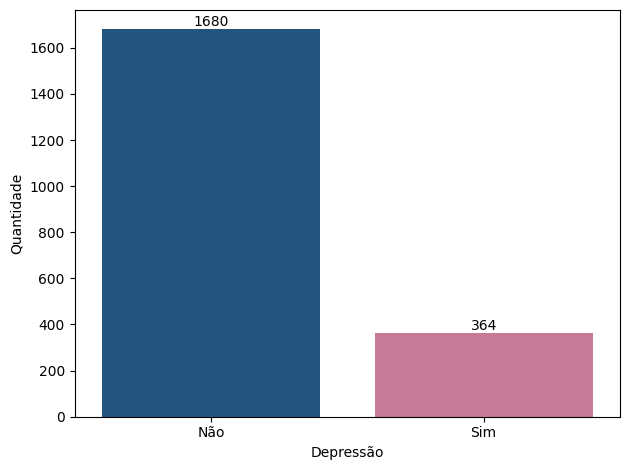

In [372]:
cores = [
    "#14568C",     
    "#D26E94",
]

ax = sns.countplot(
    x='Depression', data=df_train, palette=cores, hue='Depression', 
    legend=False, order=["0", "1"], hue_order=["0", "1"])

ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)

ax.set_xticks(["0", "1"])  
ax.set_xticklabels(['Não', 'Sim']) 

ax.set_xlabel("Depressão")
ax.set_ylabel("Quantidade")
ax.set_title("")

plt.tight_layout()
plt.show()

Observa-se dados desbalanceados, ponto importante a ser considerado em toda análise.

A seguir, avaliamos as váriaveis numéricas, trazendo suas principáis estatísticas e a distribuição do seus dados via histrograma.

In [373]:
df_train.describe()

,Age,Work/Study Hours
count,2044.0,2044.0
mean,39.047456,5.996086
std,12.281141,3.746231
min,18.0,0.0
25%,28.0,3.0
50%,39.0,6.0
75%,49.25,9.0
max,60.0,12.0


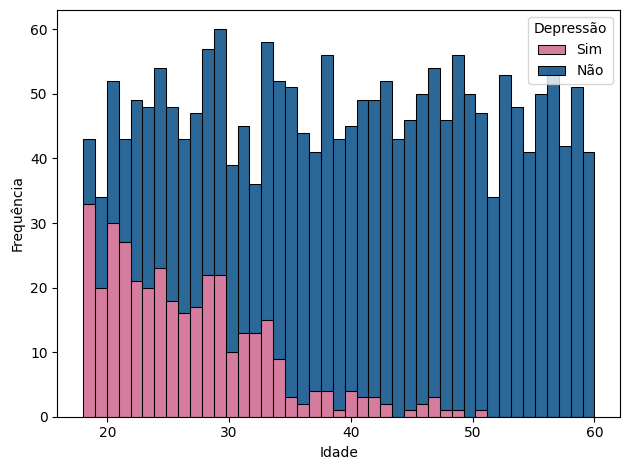

In [374]:
# HIST IDADE
var_num = df_train['Age']
var_cat = df_train['Depression']
ax = sns.histplot(
    x=var_num,
    multiple="stack",
    hue=var_cat,
    bins=len(df_train['Age'].unique()),
    edgecolor="black",
    alpha=0.9,
    palette=cores,
    hue_order=["0", "1"]
)

labels = ['Sim', 'Não'] 
ax.legend(labels, title="Depressão")

ax.set_xlabel("Idade")
ax.set_ylabel("Frequência")
ax.set_title("")

plt.tight_layout()
plt.show()

Considerações:

- Notamos que as pessoas análisadas tem idades distribuidas entre 18 até 60 anos, sem grandes diferenciações de volume em faixas etárias especificas.
- Destaque para idades mais "jovens" a qual concentra a maioria de casos de depressão.
- Apenas com o gráfico, conseguimos observar uma correlação clara entre idade e depressão. No entanto, é importante destacar que pessoas mais jovens tendem a estar mais abertas ao diagnóstico, o que pode influenciar a relação observada e não necessariamente indicar causalidade.

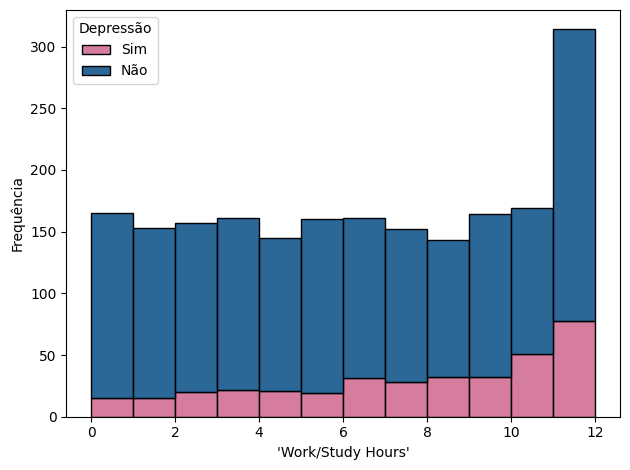

In [375]:
# HIST Work/Study Hours
var_num = df_train['Work/Study Hours']

ax = sns.histplot(
    x=var_num,
    multiple="stack",
    hue=var_cat,
    edgecolor="black",
    bins=12,
    alpha=0.9,
    palette=cores,
    hue_order=["0", "1"]
)

labels = ['Sim', 'Não'] 
ax.legend(labels, title="Depressão")

ax.set_xlabel("'Work/Study Hours'")
ax.set_ylabel("Frequência")
ax.set_title("")

plt.tight_layout()
plt.show()

Na distribuição de horas trabalhadas x depressão, não temos uma visão clara de correlação. 

A seguir iremos análisar as váriaveis categóricas em conjunto com o indicativo de depressão. Observação: O modulo ``my_charts`` vem de uma biblioteca particular a qual traz meus graficos utlizados com frequencia, facilitando personaliações, disponivel no diretório do projeto. 

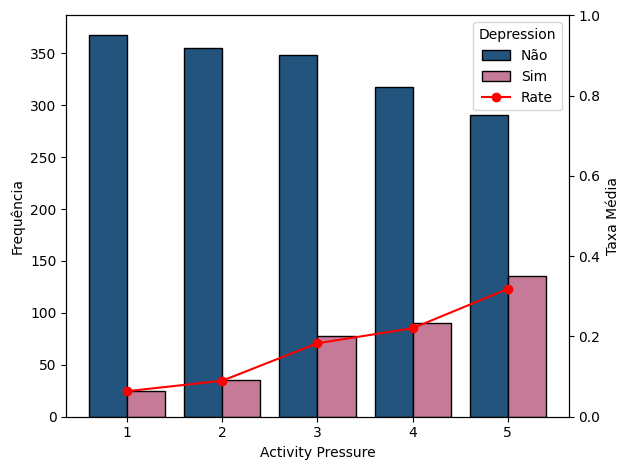

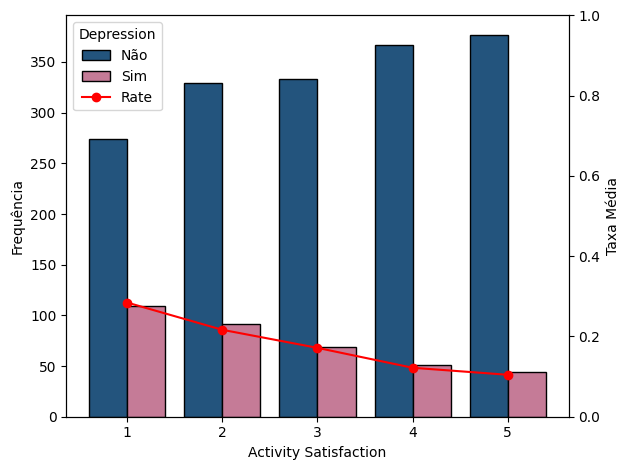

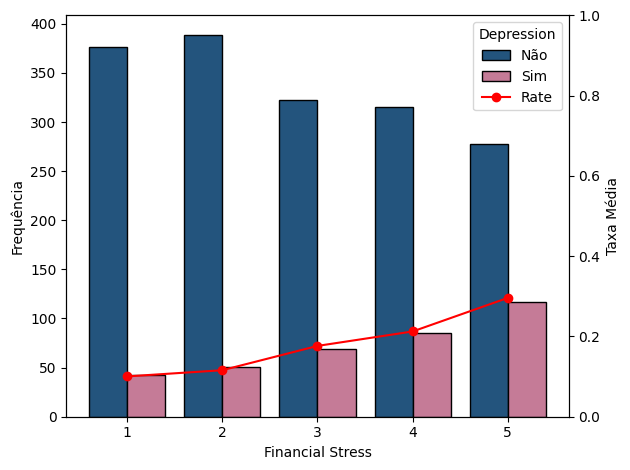

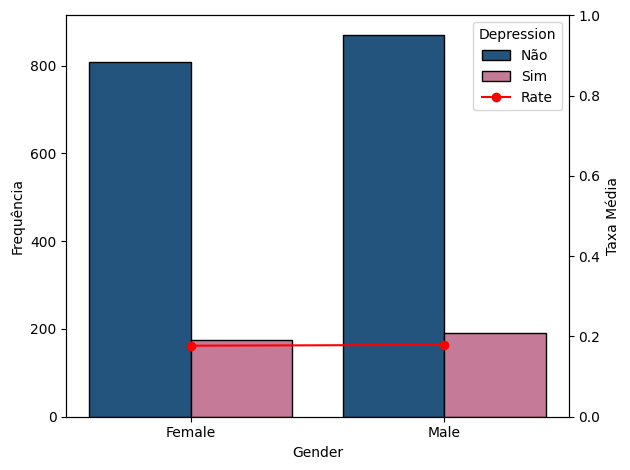

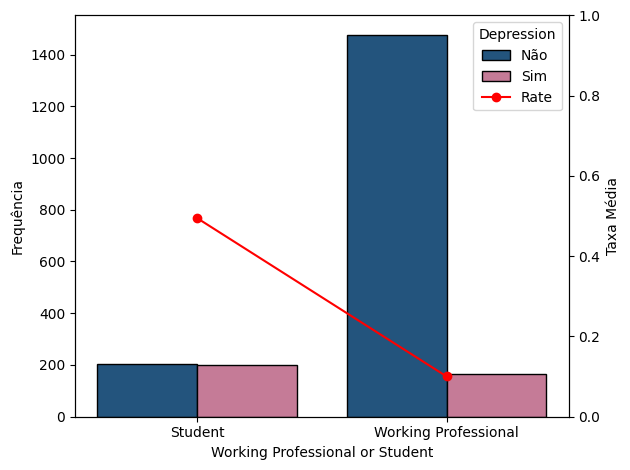

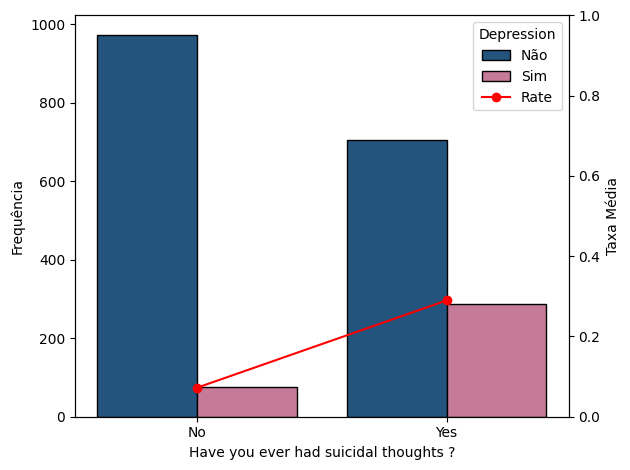

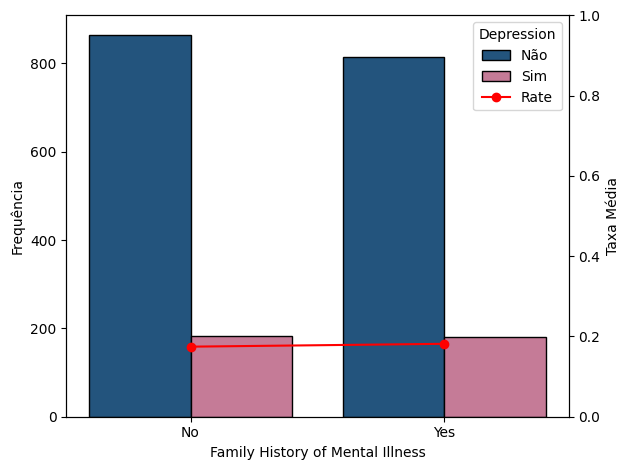

In [376]:
# Categóricas
plot_cat = [
    'Activity Pressure', 
    'Activity Satisfaction', 
    'Financial Stress',
    'Gender', 
    'Working Professional or Student',
    'Have you ever had suicidal thoughts ?',
    'Family History of Mental Illness',
]

for cat_var in plot_cat:
    my_charts.categorical_analysis(
        df=df_train,
        cat_var=cat_var,
        target_var='Depression',
        add_rate_legend=True,
        hue_order=["0", "1"],
        palette=cores,
        labels=['Não', 'Sim'],
        title=None
    )

Para as variaveis avaliadas, destacamos que:
- Em "Activity Pressure" e "Financial Stress", quanto maior o indicador, mais é a taxa de depressão, indicando correlação clara entre a váriavel x depressão;
- Ja em "Activity Satisfaction", quanto maior o indicador, menor é a taxa de depressão, também indicando correlação entre as váriaveis;
- Estudante com taxa de depressão bem acima de profissionais;
- Conforme esperado, variavel de indicativa de pensamentos suicidas tambem se destaca;
- Genero e histórico familiar não aparentam ser um fator de destaque no quesito depressão.

**Observação**: Apesar dos dados apresentarem correlação, isso não significa necessariamente uma relação de causalidade.

Ao analisarmos as variáveis de forma isolada, conseguimos identificar padrões e relações relevantes que sugerem possíveis correlações entre as informações coletadas e o risco de depressão. Com base nessas observações, e utilizando o conjunto de dados disponível, treinamos modelos de classificação para avaliar como essas variáveis interagem de for conjunta. 

Além disso, os modelos podem ser aplicados para classificar novos casos, identificando potenciais riscos de depressão, o que pode possibilitar ações significativas.

---

### **Feature Engineering**

Antes de treinar os modelos de classificação, note que a variavel ``Have you ever had suicidal thoughts ?`` é diretamente relacionada à variável alvo ``Depressão``, podendo atuar como um forte preditor do desfecho. No entanto, essa relação representa um possível vazamento de informação (data leakage), pois a presença de pensamentos suicidas é um dos critérios clínicos utilizados no diagnóstico da depressão.

Se essa variável for incluída nos modelos, eles poderam aprender a identificar casos de depressão com base em um dado que, na prática, pode não estar disponível no momento da avaliação inicial, o que resultaria em um desempenho artificialmente elevado durante o treinamento, mas sem a mesma eficácia ao ser aplicado a novos casos reais.

Para evitar esse problema e garantir que o modelo esteja capturando padrões mais gerais e úteis para a predição, a variável foi removida da análise antes do treinamento.

In [378]:
df_train = df_train.drop(columns=['Have you ever had suicidal thoughts ?'])
df_test = df_test.drop(columns=['Have you ever had suicidal thoughts ?'])

A seguir conduzimos um "Feature Engineering" realizando a padronização da váriáveis, e adequação para uso nos modelos de classificação.  

In [379]:
# Normalizar quantitativas
scaler = StandardScaler()
df_train[['Age', 'Work/Study Hours']] = scaler.fit_transform(df_train[['Age', 'Work/Study Hours']])
df_test[['Age', 'Work/Study Hours']] = scaler.transform(df_test[['Age', 'Work/Study Hours']])

In [380]:
# Dicionário de mapeamento para variáveis categóricas ordinais
mappings = {
    'Activity Pressure': {str(i): i for i in range(1, 6)},
    'Activity Satisfaction': {str(i): i for i in range(1, 6)},
    'Sleep Duration': {
        'Less than 5 hours': 1, 
        '5-6 hours': 2, 
        '7-8 hours': 3, 
        'More than 8 hours': 4
    },
    'Dietary Habits': {'Unhealthy': 1, 'Moderate': 2, 'Healthy': 3},
    'Financial Stress': {str(i): i for i in range(1, 6)}
}

# Aplicando o mapeamento
for df in [df_train, df_test]:
    for col, mapping in mappings.items():
        df[col] = df[col].map(mapping).astype(float) 

In [381]:
# Categóricas Nominais
df_train = pd.get_dummies(df_train, columns=['Gender', 'Working Professional or Student'], drop_first=True)
df_test = pd.get_dummies(df_test, columns=['Gender', 'Working Professional or Student'], drop_first=True)

In [382]:
# Binárias
binary_mappings = {
    'Family History of Mental Illness': {'No': 0, 'Yes': 1},
    'Depression': {'0': 0, '1': 1}
}

for col, mapping in binary_mappings.items():
    df_train[col] = df_train[col].map(mapping)
    df_test[col] = df_test[col].map(mapping)

In [383]:
# Categóricas nominais (alta qtd) 
df_train['Depression'] = df_train['Depression'].map(lambda x: 0 if x == "0" else (1 if x == "1" else x))

encoder = ce.TargetEncoder(cols=['Profession', 'Degree'])

df_train[['Profession', 'Degree']] = encoder.fit_transform(df_train[['Profession', 'Degree']], df_train["Depression"])
df_test[['Profession', 'Degree']] = encoder.transform(df_test[['Profession', 'Degree']])

---

### **Modelos de Classificação**

Nessa análise, treinamos diferentes modelos de machine learning com o objetivo de identificar aquele com o melhor desempenho. Para isso, consideramos os seguintes modelos:

- Regressão Logística
- Random Forest
- Naive Bayes
- XGBoost

A seleção desses modelos foi baseada na diversidade de abordagens, incluindo modelos lineares (Regressão Logística), modelos probabilísticos (Naive Bayes) e modelos baseados em árvores de decisão (Random Forest e XGBoost); devido ao tamanho reduzido do conjunto de dados, não exploramos arquiteturas de redes neurais.

In [384]:
X_train = df_train.drop(columns=["Depression"]) 
y_train = df_train["Depression"]
X_test = df_test.drop(columns=["Depression"])  
y_test = df_test["Depression"]

In [385]:
# Regressão logistica
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

print(classification_report(y_test, y_pred_logreg))

df_cm = pd.DataFrame(
    confusion_matrix(y_test, y_pred_logreg), 
    index=["Real 0", "Real 1"], 
    columns=["Predito 0", "Predito 1"]
)
print("\nMatriz de Confusão:\n", df_cm)

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       421
           1       0.76      0.71      0.74        91

    accuracy                           0.91       512
   macro avg       0.85      0.83      0.84       512
weighted avg       0.91      0.91      0.91       512


Matriz de Confusão:
         Predito 0  Predito 1
Real 0        401         20
Real 1         26         65


In [386]:
# Naive Bayes Gaussiano
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

print(classification_report(y_test, y_pred_nb))

df_cm = pd.DataFrame(
    confusion_matrix(y_test, y_pred_nb), 
    index=["Real 0", "Real 1"], 
    columns=["Predito 0", "Predito 1"]
)
print("\nMatriz de Confusão:\n", df_cm)

              precision    recall  f1-score   support

           0       0.94      0.85      0.89       421
           1       0.51      0.74      0.60        91

    accuracy                           0.83       512
   macro avg       0.72      0.79      0.75       512
weighted avg       0.86      0.83      0.84       512


Matriz de Confusão:
         Predito 0  Predito 1
Real 0        357         64
Real 1         24         67


In [387]:
# Métricas Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print(classification_report(y_test, y_pred_rf))

df_cm = pd.DataFrame(
    confusion_matrix(y_test, y_pred_rf), 
    index=["Real 0", "Real 1"], 
    columns=["Predito 0", "Predito 1"]
)
print("\nMatriz de Confusão:\n", df_cm)

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       421
           1       0.81      0.60      0.69        91

    accuracy                           0.90       512
   macro avg       0.86      0.79      0.82       512
weighted avg       0.90      0.90      0.90       512


Matriz de Confusão:
         Predito 0  Predito 1
Real 0        408         13
Real 1         36         55


In [388]:
# XGBClassifier
xgb_model = XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xg = xgb_model.predict(X_test)

print(classification_report(y_test, y_pred_xg))

df_cm = pd.DataFrame(
    confusion_matrix(y_test, y_pred_xg), 
    index=["Real 0", "Real 1"], 
    columns=["Predito 0", "Predito 1"]
)
print("\nMatriz de Confusão:\n", df_cm)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       421
           1       0.76      0.67      0.71        91

    accuracy                           0.90       512
   macro avg       0.85      0.81      0.83       512
weighted avg       0.90      0.90      0.90       512


Matriz de Confusão:
         Predito 0  Predito 1
Real 0        402         19
Real 1         30         61


In [389]:
results = pd.DataFrame({
    "Modelo": ["Regressão Logística", "Naive Bayes", "Random Forest", "XGBClassifier"],
    "Acurácia": [
        accuracy_score(y_test, y_pred_logreg),
        accuracy_score(y_test, y_pred_nb),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_xg)
    ],
    "F1-score": [
        f1_score(y_test, y_pred_logreg, average="weighted"),
        f1_score(y_test, y_pred_nb, average="weighted"),
        f1_score(y_test, y_pred_rf, average="weighted"),
        f1_score(y_test, y_pred_xg, average="weighted")
    ]
})
print(results.sort_values(by=["Acurácia", "F1-score"], ascending=False))

                Modelo  Acurácia  F1-score
0  Regressão Logística  0.910156  0.908943
3        XGBClassifier  0.904297  0.901836
2        Random Forest  0.904297  0.898647
1          Naive Bayes  0.828125  0.839323


O modelo de Regressão Logística apresentou bons resultados, com destaque na redução de falsos negativos, conforme indicado pela matriz de confusão e F1-score. Portanto, iremos considerá-lo para a continuidade da análise e interpretação dos resultados.

O uso do método de validação cruzada poderia ser aplicado para avaliar melhor a robustez do modelo, entretanto, como o objetivo principal é obter uma análise inicial do desempenho e interpretar os resultados de forma objetiva, optamos por não utilização neste momento.

A seguir, apresentamos a tabela com os coeficientes estimados pelo modelo e seus respectivos odds ratios, o que permitinde a interpretação do impacto de cada variável na predição.

In [390]:
coefficients = logreg.coef_
intercept = logreg.intercept_

coef_df = pd.DataFrame({
    'Variável': X_train.columns,
    'Coeficiente': coefficients[0], 
    'Odds Ratio': np.exp(coefficients[0])  
})
intercept_df = pd.DataFrame({
    'Variável': ['Intercept'],
    'Coeficiente': [intercept[0]],
    'Odds Ratio': [np.exp(intercept[0])]
})

coef_df = pd.concat([intercept_df, coef_df], ignore_index=True)

coef_df_sorted = coef_df.sort_values(by='Odds Ratio', ascending=False).reset_index(drop=True)
print(coef_df_sorted)

                                             Variável  Coeficiente  Odds Ratio
0                                          Profession     1.450092    4.263506
1                                   Activity Pressure     1.075302    2.930878
2                                    Work/Study Hours     0.859520    2.362026
3                    Family History of Mental Illness     0.722437    2.059445
4                                    Financial Stress     0.717941    2.050208
5                                              Degree     0.259060    1.295711
6                                         Gender_Male    -0.015731    0.984392
7                                      Sleep Duration    -0.420497    0.656720
8                                      Dietary Habits    -0.749711    0.472503
9                               Activity Satisfaction    -0.821349    0.439838
10  Working Professional or Student_Working Profes...    -1.258134    0.284184
11                                                Ag

A partir da tabela de coeficientes, podemos interpretar os fatores que influenciam o risco de depressão:

**Fatores que aumentam a probabilidade de depressão (odds ratio > 1)**:
- Profissão: Indivíduos com profissões específicas apresentam uma probabilidade significativamente maior de depressão.
- Pressão por Atividades: Quanto maior a pressão pelas atividades realizadas, maior o risco de depressão.
- Horas de Trabalho/Estudo: A quantidade de horas dedicadas ao trabalho ou estudo tem uma forte associação com o aumento do risco de depressão.
- Histórico Familiar de Doenças Mentais: Ter um histórico familiar de doenças mentais aumenta consideravelmente a chance de desenvolver depressão.
- Estresse Financeiro: O estresse financeiro também é um fator de risco importante para o desenvolvimento de depressão.
- Grau de Escolaridade: Indivíduos com maior grau de escolaridade têm um risco ligeiramente aumentado de depressão.

**Fatores que reduzem a probabilidade de depressão (odds ratio < 1)**:
- Duração do Sono: Uma maior duração do sono está associada a uma menor probabilidade de depressão.
- Hábitos Alimentares: Hábitos alimentares saudáveis contribuem para um menor risco de depressão.
- Satisfação com as Atividades: A satisfação com as atividades realizadas no dia a dia reduz consideravelmente a chance de depressão.
- Profissional ou Estudante em Tempo Integral: Estar empregado como profissional ou estudante em tempo integral reduz substancialmente o risco de depressão.
- Idade: A idade é um fator que reduz a probabilidade de depressão. Vale ressaltar novamente que isso não indica uma relação de causa e efeito, mas uma questão relacionada à percepção e ao estigma em torno da depressão em faixas etárias mais avançadas.


Com tudo, considerando os resultados obtidos na análise exploratória e posteriormente via modelo de regressão logistica, podemos concluir que os resultados indicam que a sobrecarga de responsabilidades, histórico familiar e fatores financeiros aumentam significativamente o risco de depressão. Em contrapartida, hábitos saudáveis, satisfação com as atividades diárias e maior idade parecem atuar como fatores de proteção.